In [ ]:
!pip install plotly

In [1]:
import statsmodels.api as sm
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import plotly.express as px

/home/devendra/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("../data/suicide_master.csv")
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Thailand,2016,female,75+ years,69,1589015,4.34,Thailand2016,NaN,4.120000e+11,6713,Silent
27816,Thailand,2016,female,55-74 years,222,6049756,3.67,Thailand2016,NaN,4.120000e+11,6713,Boomers
27817,Thailand,2016,female,35-54 years,375,10629684,3.53,Thailand2016,NaN,4.120000e+11,6713,Generation X
27818,Thailand,2016,female,25-34 years,116,4702656,2.47,Thailand2016,NaN,4.120000e+11,6713,Millenials
27819,Thailand,2016,female,15-24 years,60,4525574,1.33,Thailand2016,NaN,4.120000e+11,6713,Millenials


In [3]:
# remove special character
df.columns = df.columns.str.replace(' ', '')

In [4]:
df.columns = map(str.lower, df.columns)

In [5]:
df.rename( {'gdp_for_year($)':'yearly_gdp' } , axis=1 , inplace = True)
df.rename( {'gdp_per_capita($)':'gdp_per_capita' } , axis=1 , inplace = True)
df.rename( {'hdiforyear':'yearly_hdi' } , axis=1 , inplace = True)
df.rename( {'suicides/100kpop':'sucid_in_hundredk' } , axis=1 , inplace = True)
df.rename( {'suicides_no':'suicides' } , axis=1 , inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides           27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   sucid_in_hundredk  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   yearly_hdi         8364 non-null   float64
 9   yearly_gdp         27820 non-null  float64
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.5+ MB


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,27820,101,Austria,382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,27820.0,NaN,NaN,NaN,2001.258375,8.469055,1985.0,1995.0,2002.0,2008.0,2016.0
sex,27820,2,female,13910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,27820,6,15-24 years,4642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suicides,27820.0,NaN,NaN,NaN,242.574407,902.047917,0.0,3.0,25.0,131.0,22338.0
population,27820.0,NaN,NaN,NaN,1844793.617398,3911779.441756,278.0,97498.5,430150.0,1486143.25,43805214.0
sucid_in_hundredk,27820.0,NaN,NaN,NaN,12.816097,18.961511,0.0,0.92,5.99,16.62,224.97
country-year,27820,2321,Antigua and Barbuda1985,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yearly_hdi,8364.0,NaN,NaN,NaN,0.776601,0.093367,0.483,0.713,0.779,0.855,0.944
yearly_gdp,27820.0,NaN,NaN,NaN,445597926548.398254,1453907394884.571777,46919625.0,8985352832.0,48114688201.0,260000000000.0,18100000000000.0


In [8]:
df.head()

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_hdi,yearly_gdp,gdp_per_capita,generation
0,Antigua and Barbuda,1985,female,15-24 years,0,7709,0.0,Antigua and Barbuda1985,NaN,240923926.0,3850,Generation X
1,Antigua and Barbuda,1985,female,25-34 years,0,6344,0.0,Antigua and Barbuda1985,NaN,240923926.0,3850,Boomers
2,Antigua and Barbuda,1985,female,35-54 years,0,6173,0.0,Antigua and Barbuda1985,NaN,240923926.0,3850,Silent
3,Antigua and Barbuda,1985,female,5-14 years,0,7339,0.0,Antigua and Barbuda1985,NaN,240923926.0,3850,Generation X
4,Antigua and Barbuda,1985,female,55-74 years,0,3778,0.0,Antigua and Barbuda1985,NaN,240923926.0,3850,G.I. Generation


In [9]:
df_cont = pd.read_csv("../data/countryContinent.csv", encoding="ISO-8859-1")
df_cont.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [10]:
def find_mismatch (array_1, array_2, only_out=True):
    for i in array_1.unique():
         if i in array_2.unique():
            pass
         else:
            
            print(i, "is not found !")
            
    
find_mismatch(df.country, df_cont.country, True)


Republic of Korea is not found !
Saint Vincent and Grenadines is not found !
United Kingdom is not found !
United States is not found !
Macau is not found !


In [11]:
final = df.merge(df_cont[['country', 'continent', 'code_3']], on = "country")
final.rename( {'code_3':'country_code' } , axis=1 , inplace = True)
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26392 entries, 0 to 26391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            26392 non-null  object 
 1   year               26392 non-null  int64  
 2   sex                26392 non-null  object 
 3   age                26392 non-null  object 
 4   suicides           26392 non-null  int64  
 5   population         26392 non-null  int64  
 6   sucid_in_hundredk  26392 non-null  float64
 7   country-year       26392 non-null  object 
 8   yearly_hdi         8040 non-null   float64
 9   yearly_gdp         26392 non-null  float64
 10  gdp_per_capita     26392 non-null  int64  
 11  generation         26392 non-null  object 
 12  continent          26392 non-null  object 
 13  country_code       26392 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 3.0+ MB


In [12]:
url = '../data/suicide_moredata.csv'

second_data = pd.read_csv(url)
second_data.tail()


,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,"Unemployment, total (% of total labor force) (modeled ILO estimate)","Physicians (per 1,000 people)",Strength of legal rights index (0=weak to 12=strong),"Labor force, total","Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Refugee population by country or territory of origin,"Contributing family workers, total (% of total employment) (modeled ILO estimate)",Access to electricity (% of population),"Lower secondary completion rate, total (% of relevant age group)"
15105,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15106,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15107,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15108,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15109,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
second_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 26 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   country                                                                            15110 non-null  object 
 1   year                                                                               15110 non-null  int64  
 2   sex                                                                                15110 non-null  object 
 3   age                                                                                15110 non-null  object 
 4   suicides_no                                                                        15110 non-null  int64  
 5   population                                                                         15110 non-null  int

In [14]:
second_data.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population','suicidesper100k', 'country-year', 'yearlyHDI',
    'GDPpyear', 'GDPpcapita', 'generation', 'suicide%', 'Internetusers', 'Expenses', 'employeecompensation','Unemployment', 'Physiciansp1000', 'Legalrights', 'Laborforcetotal','Lifeexpectancy', 'Mobilesubscriptionsp100','Refugees', 'Selfemployed', 'electricityacess', 'secondarycompletion']

In [15]:
df.year.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [16]:
second_data.year.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [17]:
second_data.rename( {'GDPpyear':'yearly_gdp' } , axis=1 , inplace = True)
second_data.rename( {'GDPpcapita':'gdp_per_capita' } , axis=1 , inplace = True)
second_data.rename( {'yearlyHDI':'yearly_hdi' } , axis=1 , inplace = True)
second_data.rename( {'suicidesper100k':'sucid_in_hundredk' } , axis=1 , inplace = True)
second_data.rename( {'suicides_no':'suicides' } , axis=1 , inplace = True)
second_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  15110 non-null  object 
 1   year                     15110 non-null  int64  
 2   sex                      15110 non-null  object 
 3   age                      15110 non-null  object 
 4   suicides                 15110 non-null  int64  
 5   population               15110 non-null  int64  
 6   sucid_in_hundredk        15110 non-null  float64
 7   country-year             15110 non-null  object 
 8   yearly_hdi               4740 non-null   float64
 9   yearly_gdp               15110 non-null  float64
 10  gdp_per_capita           15110 non-null  int64  
 11  generation               15110 non-null  object 
 12  suicide%                 15110 non-null  float64
 13  Internetusers            15002 non-null  float64
 14  Expenses              

In [18]:
second_data.columns = map(str.lower, second_data.columns)

In [19]:
# remove special character
second_data.columns = second_data.columns.str.replace(' ', '')

In [20]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26392 entries, 0 to 26391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            26392 non-null  object 
 1   year               26392 non-null  int64  
 2   sex                26392 non-null  object 
 3   age                26392 non-null  object 
 4   suicides           26392 non-null  int64  
 5   population         26392 non-null  int64  
 6   sucid_in_hundredk  26392 non-null  float64
 7   country-year       26392 non-null  object 
 8   yearly_hdi         8040 non-null   float64
 9   yearly_gdp         26392 non-null  float64
 10  gdp_per_capita     26392 non-null  int64  
 11  generation         26392 non-null  object 
 12  continent          26392 non-null  object 
 13  country_code       26392 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 3.0+ MB


In [21]:

            
    
find_mismatch(second_data.country, df_cont.country, True)

United Kingdom is not found !
United States is not found !


In [22]:
second_data = second_data.merge(final[['country', 'continent', 'country_code']])
second_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808012 entries, 0 to 4808011
Data columns (total 28 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   country                  object 
 1   year                     int64  
 2   sex                      object 
 3   age                      object 
 4   suicides                 int64  
 5   population               int64  
 6   sucid_in_hundredk        float64
 7   country-year             object 
 8   yearly_hdi               float64
 9   yearly_gdp               float64
 10  gdp_per_capita           int64  
 11  generation               object 
 12  suicide%                 float64
 13  internetusers            float64
 14  expenses                 float64
 15  employeecompensation     float64
 16  unemployment             float64
 17  physiciansp1000          float64
 18  legalrights              float64
 19  laborforcetotal          int64  
 20  lifeexpectancy           float64
 21  mobilesu

In [23]:
second_data.rename( {'code_3':'country_code' } , axis=1 , inplace = True)
second_data.rename( {'physiciansp1000':'physician_price' } , axis=1 , inplace = True)
second_data.rename( {'mobilesubscriptionsp100':'mobilesubscriptions' } , axis=1 , inplace = True)
second_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808012 entries, 0 to 4808011
Data columns (total 28 columns):
 #   Column                Dtype  
---  ------                -----  
 0   country               object 
 1   year                  int64  
 2   sex                   object 
 3   age                   object 
 4   suicides              int64  
 5   population            int64  
 6   sucid_in_hundredk     float64
 7   country-year          object 
 8   yearly_hdi            float64
 9   yearly_gdp            float64
 10  gdp_per_capita        int64  
 11  generation            object 
 12  suicide%              float64
 13  internetusers         float64
 14  expenses              float64
 15  employeecompensation  float64
 16  unemployment          float64
 17  physician_price       float64
 18  legalrights           float64
 19  laborforcetotal       int64  
 20  lifeexpectancy        float64
 21  mobilesubscriptions   float64
 22  refugees              float64
 23  selfemp

In [24]:
second_data.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_hdi', 'yearly_gdp',
       'gdp_per_capita', 'generation', 'suicide%', 'internetusers', 'expenses',
       'employeecompensation', 'unemployment', 'physician_price',
       'legalrights', 'laborforcetotal', 'lifeexpectancy',
       'mobilesubscriptions', 'refugees', 'selfemployed', 'electricityacess',
       'secondarycompletion', 'continent', 'country_code'],
      dtype='object')

In [25]:
second_data.shape

(4808012, 28)

In [26]:
df.shape

(27820, 12)

In [27]:
#good sample of the different regions.

countrynames = ['Argentina','Armenia','Australia',    'Austria',
    'Belgium',    'Brazil',    'Bulgaria',    'Canada',    'Chile',    'Colombia',    'Croatia',    'Cuba',    'Czech Republic',    'Denmark',
    'Finland',    'France',    'Germany',    'Greece',    'Hungary',    'Iceland',   'Ireland', 'Israel','Italy','Japan','Mexico', 'Netherlands','New Zealand','Norway','Poland', 'Portugal','Romania','Russian Federation','South Africa', 'Spain','Sweden', 'Switzerland','Thailand', 'Turkmenistan','Ukraine','United Kingdom', 'United States']

# countrynames

### Collapsing categories with string matching

In [28]:
countries_2 = second_data['country'].unique()
print(countries_2)

['Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Belgium'
 'Brazil' 'Bulgaria' 'Canada' 'Chile' 'Colombia' 'Croatia' 'Cuba'
 'Czech Republic' 'Denmark' 'Finland' 'France' 'Georgia' 'Germany'
 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan'
 'Mexico' 'Mongolia' 'Netherlands' 'New Zealand' 'Norway' 'Poland'
 'Portugal' 'Romania' 'Russian Federation' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Thailand' 'Turkey' 'Turkmenistan' 'Ukraine'
 'United Arab Emirates' 'Uzbekistan']


In [29]:
countries = df['country'].unique()
print(countries)

['Antigua and Barbuda' 'Argentina' 'Australia' 'Austria' 'Bahamas'
 'Bahrain' 'Barbados' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'Colombia' 'Costa Rica' 'Dominica' 'Ecuador' 'France' 'Greece' 'Grenada'
 'Iceland' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Kuwait'
 'Luxembourg' 'Malta' 'Mauritius' 'Mexico' 'Netherlands' 'New Zealand'
 'Panama' 'Paraguay' 'Portugal' 'Puerto Rico' 'Republic of Korea'
 'Saint Vincent and Grenadines' 'Seychelles' 'Singapore' 'Spain'
 'Sri Lanka' 'Suriname' 'Thailand' 'Trinidad and Tobago' 'United Kingdom'
 'United States' 'Uruguay' 'Belize' 'Guatemala' 'Norway' 'Saint Lucia'
 'Albania' 'Finland' 'Sweden' 'Turkmenistan' 'Ukraine' 'Guyana' 'Romania'
 'Russian Federation' 'Armenia' 'Azerbaijan' 'Belarus' 'Czech Republic'
 'El Salvador' 'Georgia' 'Germany' 'Kazakhstan' 'Kyrgyzstan' 'Poland'
 'Saint Kitts and Nevis' 'Uzbekistan' 'Hungary' 'Kiribati' 'Cuba'
 'Philippines' 'Slovakia' 'Denmark' 'Macau' 'Aruba' 'Croatia' 'Estonia'
 'Latvia' 'Lithuania' 'Q

In [30]:
df1 = second_data.copy()
final = df1.iloc[np.where(df1.country == countrynames[0])]
for i, x in enumerate(countrynames[1:]):
    final = final.append(df1.iloc[np.where(df1.country == x)])
    
# df.head()

In [31]:
final.shape

(4577800, 28)

In [32]:
final = final[final.year >= 1985]
final = final[final.year <= 2016]

In [33]:
final['country'] = final['country'].astype('category')
final['continent'] = final['continent'].astype('category')
final['sex'] = final['sex'].astype('category')
final['generation'] = final['generation'].astype('category')
final['age'] = final['age'].astype('category')

In [34]:
final.head(2)

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_hdi,yearly_gdp,...,legalrights,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,secondarycompletion,continent,country_code
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
1,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG


In [35]:
df.rename( {'suicides_no':'suicides' } , axis=1 , inplace = True)

### Missingness Data

In [36]:
# Get summary of missingness
final.isna().sum()

country                       0
year                          0
sex                           0
age                           0
suicides                      0
population                    0
sucid_in_hundredk             0
country-year                  0
yearly_hdi              3150064
yearly_gdp                    0
gdp_per_capita                0
generation                    0
suicide%                      0
internetusers             29664
expenses                 389880
employeecompensation     406296
unemployment                  0
physician_price          707784
legalrights             2838312
laborforcetotal               0
lifeexpectancy                0
mobilesubscriptions           0
refugees                  47040
selfemployed                  0
electricityacess         102864
secondarycompletion     1696200
continent                     0
country_code                  0
dtype: int64

In [37]:
# Useful package for visualizing and understanding missing data
# import missingno as msno
import matplotlib.pyplot as plt

# Visualize missingness
# msno.matrix(final)
# plt.show()

In [38]:
# Isolate missing and complete values aside
missing_hdi = final[final['yearly_hdi'].isna()]
complete_hdi = final[~final['yearly_hdi'].isna()]


In [39]:
missing_hdi.describe()

,year,suicides,population,sucid_in_hundredk,yearly_hdi,yearly_gdp,gdp_per_capita,suicide%,internetusers,expenses,...,unemployment,physician_price,legalrights,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,secondarycompletion
count,3.150064e+06,3.150064e+06,3.150064e+06,3.150064e+06,0.0,3.150064e+06,3.150064e+06,3.150064e+06,3.120400e+06,2.869432e+06,...,3.150064e+06,2.643520e+06,1.224736e+06,3.150064e+06,3.150064e+06,3.150064e+06,3.115960e+06,3.150064e+06,3.067168e+06,2.003632e+06
mean,1.999166e+03,3.950634e+02,2.701773e+06,1.475886e+01,NaN,5.019257e+11,1.918314e+04,1.475884e-02,1.864621e+01,1.805898e+01,...,5.070261e+00,1.595999e+00,1.269825e-02,1.048462e+07,4.633921e+01,3.608867e+01,1.002146e+04,2.023139e+00,5.953722e+01,3.541762e+01
std,7.798087e+00,1.231275e+03,3.899154e+06,1.887252e+01,NaN,8.545794e+11,1.706834e+04,1.887248e-02,2.620182e+01,1.724703e+01,...,5.478771e+00,1.705557e+00,2.250151e-01,1.884880e+07,3.708858e+01,4.493803e+01,4.597198e+04,4.423635e+00,4.850580e+01,4.471852e+01
min,1.985000e+03,0.000000e+00,4.400000e+03,0.000000e+00,NaN,1.201313e+09,3.570000e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.993000e+03,1.900000e+01,4.381000e+05,2.420000e+00,NaN,6.607451e+10,4.461000e+03,2.416361e-03,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.999000e+03,8.500000e+01,1.042374e+06,8.380000e+00,NaN,1.905210e+11,1.498100e+04,8.378631e-03,2.915699e+00,1.802704e+01,...,4.221000e+00,1.253200e+00,0.000000e+00,2.523355e+06,7.153100e+01,7.511208e+00,1.300000e+01,4.500000e-01,9.878233e+01,0.000000e+00
75%,2.006000e+03,2.800000e+02,3.406300e+06,1.980000e+01,NaN,4.718210e+11,2.842900e+04,1.979884e-02,3.128840e+01,3.442995e+01,...,8.470000e+00,3.170000e+00,0.000000e+00,1.096807e+07,7.822927e+01,7.729856e+01,6.780000e+02,1.815000e+00,1.000000e+02,8.692391e+01
max,2.016000e+03,2.233800e+04,2.846186e+07,1.776100e+02,NaN,5.231380e+12,1.034310e+05,1.776089e-01,9.300000e+01,5.171466e+01,...,3.347300e+01,6.615700e+00,4.000000e+00,9.542172e+07,8.293146e+01,1.656610e+02,5.517440e+05,3.033200e+01,1.000000e+02,1.119233e+02


In [40]:
complete_hdi.describe()

,year,suicides,population,sucid_in_hundredk,yearly_hdi,yearly_gdp,gdp_per_capita,suicide%,internetusers,expenses,...,unemployment,physician_price,legalrights,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,secondarycompletion
count,1.427736e+06,1.427736e+06,1.427736e+06,1.427736e+06,1.427736e+06,1.427736e+06,1.427736e+06,1.427736e+06,1.427736e+06,1.318488e+06,...,1.427736e+06,1.226496e+06,514752.000000,1.427736e+06,1.427736e+06,1.427736e+06,1.414800e+06,1.427736e+06,1.407768e+06,877968.000000
mean,2.004491e+03,2.862639e+02,2.566195e+06,1.295394e+01,8.106563e-01,6.626222e+11,2.606589e+04,1.295385e-02,3.447874e+01,2.386605e+01,...,6.431358e+00,2.197565e+00,1.510024,1.169765e+07,5.721416e+01,6.332928e+01,9.373888e+03,2.290945e+00,7.307329e+01,53.828028
std,9.298311e+00,6.549231e+02,3.678287e+06,1.610820e+01,8.716909e-02,1.058922e+12,2.226931e+04,1.610820e-02,3.381965e+01,1.737971e+01,...,5.836310e+00,1.753006e+00,2.746451,1.839824e+07,3.413176e+01,5.562165e+01,4.987882e+04,4.535733e+00,4.378118e+01,46.527858
min,1.985000e+03,0.000000e+00,4.500000e+03,0.000000e+00,5.390000e-01,1.468317e+09,4.260000e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.995000e+03,1.900000e+01,4.679860e+05,2.230000e+00,7.470000e-01,9.985353e+10,7.892000e+03,2.225032e-03,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,2.010000e+03,8.000000e+01,1.039605e+06,7.570000e+00,8.270000e-01,2.598020e+11,2.086200e+04,7.568154e-03,2.793000e+01,2.768840e+01,...,6.420000e+00,2.520700e+00,0.000000,4.305310e+06,7.561756e+01,7.187082e+01,4.900000e+01,6.470000e-01,1.000000e+02,85.191040
75%,2.012000e+03,2.550000e+02,3.330600e+06,1.781000e+01,8.840000e-01,5.837830e+11,4.118400e+04,1.780991e-02,6.709000e+01,3.824828e+01,...,8.897000e+00,3.487500e+00,2.000000,1.754956e+07,8.019268e+01,1.141422e+02,7.380000e+02,2.201000e+00,1.000000e+02,96.580650
max,2.014000e+03,8.073000e+03,2.797110e+07,1.659600e+02,9.440000e-01,6.203210e+12,1.098040e+05,1.659614e-01,9.654680e+01,6.218678e+01,...,3.022900e+01,7.334100e+00,12.000000,9.899009e+07,8.333195e+01,1.721218e+02,3.967170e+05,3.123500e+01,1.000000e+02,116.367400


In [41]:
sorted_final = final.sort_values(by = 'year')
#msno.matrix(sorted_final)
#plt.show()

In [42]:
final.drop('yearly_hdi', axis=1, inplace=True)
final.drop('secondarycompletion', axis=1, inplace=True)
final.drop('legalrights', axis=1, inplace=True)

In [43]:
#checking percentage of missing values
percent_missing = final.isnull().sum() * 100 / len(final)
missing_value_final = pd.DataFrame({'percent_missing': percent_missing})
missing_value_final.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_final

,percent_missing
physician_price,15.461226
employeecompensation,8.875355
expenses,8.516755
electricityacess,2.247018
refugees,1.027568
internetusers,0.647997
continent,0.000000
selfemployed,0.000000
mobilesubscriptions,0.000000
lifeexpectancy,0.000000


in above case yearly_hdi,secondarycompletion and legalrights are missing more than 30%. I will be removing these columns as I am unable to replace the majority of data for them.

In [44]:
final.internetusers=final.internetusers.fillna(final.internetusers	. min())
final.employeecompensation=final.employeecompensation.fillna(final.employeecompensation.mean())
final.electricityacess=final.electricityacess.fillna(final.electricityacess.mean())
final.refugees=final.refugees.fillna(final.refugees.mean())
final.expenses=final.expenses.fillna(final.expenses.mean())
final.physician_price=final.physician_price.fillna(final.physician_price.mean())

In [45]:
percent_missing = final.isnull().sum() * 100 / len(final)
missing_value_final = pd.DataFrame({'percent_missing': percent_missing})
missing_value_final.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_final

,percent_missing
country,0.0
expenses,0.0
continent,0.0
electricityacess,0.0
selfemployed,0.0
refugees,0.0
mobilesubscriptions,0.0
lifeexpectancy,0.0
laborforcetotal,0.0
physician_price,0.0


In [46]:
df.year.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [47]:
second_data.year.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [48]:
final.year.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [49]:
final.country.unique()

['Argentina', 'Armenia', 'Australia', 'Austria', 'Belgium', ..., 'Sweden', 'Switzerland', 'Thailand', 'Turkmenistan', 'Ukraine']
Length: 39
Categories (39, object): ['Argentina', 'Armenia', 'Australia', 'Austria', ..., 'Switzerland', 'Thailand', 'Turkmenistan', 'Ukraine']

In [50]:
final.head(2)

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_gdp,gdp_per_capita,...,unemployment,physician_price,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,continent,country_code
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,8.841667e+10,3264,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
1,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,8.841667e+10,3264,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,Americas,ARG


In [51]:
final.shape

(4577800, 25)

In [52]:
final.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_gdp', 'gdp_per_capita',
       'generation', 'suicide%', 'internetusers', 'expenses',
       'employeecompensation', 'unemployment', 'physician_price',
       'laborforcetotal', 'lifeexpectancy', 'mobilesubscriptions', 'refugees',
       'selfemployed', 'electricityacess', 'continent', 'country_code'],
      dtype='object')

In [53]:
final.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_gdp', 'gdp_per_capita',
       'generation', 'suicide%', 'internetusers', 'expenses',
       'employeecompensation', 'unemployment', 'physician_price',
       'laborforcetotal', 'lifeexpectancy', 'mobilesubscriptions', 'refugees',
       'selfemployed', 'electricityacess', 'continent', 'country_code'],
      dtype='object')

In [54]:
final['internetusers'] = final['internetusers'].replace(r'^\s*$', np.nan, regex=True)
final['unemployment'] = final['unemployment'].replace(r'^\s*$', np.nan, regex=True)
final['physician_price'] = final['physician_price'].replace(r'^\s*$', np.nan, regex=True)
final['internetusers'] = final['internetusers'].replace(r'^\s*$', np.nan, regex=True)
final['laborforcetotal'] = final['laborforcetotal'].replace(r'^\s*$', np.nan, regex=True)
final['selfemployed'] = final['selfemployed'].replace(r'^\s*$', np.nan, regex=True)
final['electricityacess'] = final['electricityacess'].replace(r'^\s*$', np.nan, regex=True)
final['lifeexpectancy'] = final['lifeexpectancy'].replace(r'^\s*$', np.nan, regex=True)
final['mobilesubscription'] = final['mobilesubscriptions'].replace(r'^\s*$', np.nan, regex=True)
final['refugees'] = final['refugees'].replace(r'^\s*$', np.nan, regex=True)
final['expenses'] = final['expenses'].replace(r'^\s*$', np.nan, regex=True)
final['employeecompensation'] = final['employeecompensation'].replace(r'^\s*$', np.nan, regex=True)
final['physician_price'] = final['physician_price'].replace(r'^\s*$', np.nan, regex=True)

In [55]:
final.loc[ final['internetusers'] == 0 | np.isnan(final['internetusers']), 'internetusers' ] = final['internetusers'].mean()
final.loc[ final['unemployment'] == 0 | np.isnan(final['unemployment']), 'unemployment' ] = final['unemployment'].mean()
final.loc[ final['physician_price'] == 0 | np.isnan(final['physician_price']), 'physician_price' ] = final['physician_price'].min()
final.loc[ final['laborforcetotal'] == 0 | np.isnan(final['laborforcetotal']), 'laborforcetotal' ] = final['laborforcetotal'].mean()
final.loc[ final['selfemployed'] == 0 | np.isnan(final['selfemployed']), 'selfemployed' ] = final['selfemployed'].mean()
final.loc[ final['electricityacess'] == 0 | np.isnan(final['electricityacess']), 'electricityacess' ] = final['electricityacess'].mean()
final.loc[ final['lifeexpectancy'] == 0 | np.isnan(final['lifeexpectancy']), 'lifeexpectancy' ] = final['lifeexpectancy'].mean()
final.loc[ final['mobilesubscriptions'] == 0 | np.isnan(final['mobilesubscriptions']), 'mobilesubscriptions' ] = final['mobilesubscriptions'].mean()
final.loc[ final['refugees'] == 0 | np.isnan(final['refugees']), 'refugees' ] = final['refugees'].mean()
final.loc[ final['expenses'] == 0 | np.isnan(final['expenses']), 'expenses' ] = final['expenses'].mean()
final.loc[ final['employeecompensation'] == 0 | np.isnan(final['employeecompensation']), 'employeecompensation' ] = final['employeecompensation'].mean()
final.loc[ final['physician_price'] == 0 | np.isnan(final['physician_price']), 'physician_price' ] = final['physician_price'].mean()

In [56]:
final

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_gdp,gdp_per_capita,...,physician_price,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,continent,country_code,mobilesubscription
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,8.841667e+10,3264,...,1.786649,1.086294e+07,49.730922,44.584545,9819.245469,2.106663,63.795524,Americas,ARG,0.0
1,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,8.841667e+10,3264,...,1.786649,1.086294e+07,49.730922,44.584545,9819.245469,2.106663,63.795524,Americas,ARG,0.0
2,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,8.841667e+10,3264,...,1.786649,1.086294e+07,49.730922,44.584545,9819.245469,2.106663,63.795524,Americas,ARG,0.0
3,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,8.841667e+10,3264,...,1.786649,1.086294e+07,49.730922,44.584545,9819.245469,2.106663,63.795524,Americas,ARG,0.0
4,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,8.841667e+10,3264,...,1.786649,1.086294e+07,49.730922,44.584545,9819.245469,2.106663,63.795524,Americas,ARG,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4733127,Ukraine,2015,female,5-14 years,19,2010824,0.94,Ukraine2015,9.103096e+10,2256,...,1.786649,1.086294e+07,49.730922,44.584545,9819.245469,2.106663,63.795524,Europe,UKR,0.0
4733128,Ukraine,2015,female,5-14 years,19,2010824,0.94,Ukraine2015,9.103096e+10,2256,...,1.786649,1.086294e+07,49.730922,44.584545,9819.245469,2.106663,63.795524,Europe,UKR,0.0
4733129,Ukraine,2015,female,5-14 years,19,2010824,0.94,Ukraine2015,9.103096e+10,2256,...,1.786649,1.086294e+07,49.730922,44.584545,9819.245469,2.106663,63.795524,Europe,UKR,0.0
4733130,Ukraine,2015,female,5-14 years,19,2010824,0.94,Ukraine2015,9.103096e+10,2256,...,1.786649,1.086294e+07,49.730922,44.584545,9819.245469,2.106663,63.795524,Europe,UKR,0.0


In [57]:
final.fillna(df.mean(), inplace=True)

/home/devendra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [58]:
final.shape

(4577800, 26)

In [59]:
final.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_gdp', 'gdp_per_capita',
       'generation', 'suicide%', 'internetusers', 'expenses',
       'employeecompensation', 'unemployment', 'physician_price',
       'laborforcetotal', 'lifeexpectancy', 'mobilesubscriptions', 'refugees',
       'selfemployed', 'electricityacess', 'continent', 'country_code',
       'mobilesubscription'],
      dtype='object')

In [60]:
# define function called plot_box
def plot_box(final, ft):
    final.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

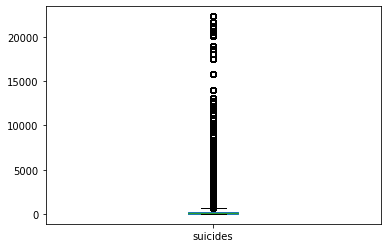

In [61]:
# plot the diagram
plot_box(final, "suicides")

In [62]:
final.suicides

0          202
1          202
2          202
3          202
4          202
          ... 
4733127     19
4733128     19
4733129     19
4733130     19
4733131     19
Name: suicides, Length: 4577800, dtype: int64

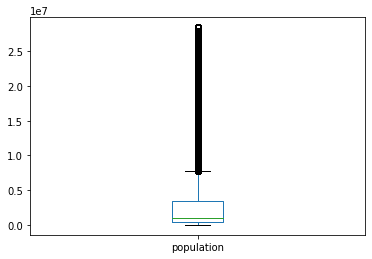

In [63]:
# plot the diagram
plot_box(final, "population")

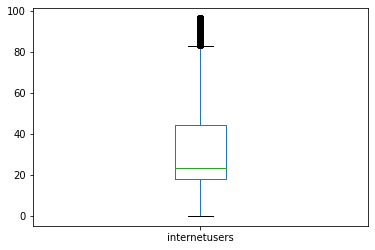

In [64]:
plot_box(final, "internetusers")


In [65]:
final.shape

(4577800, 26)

In [66]:
final.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_gdp', 'gdp_per_capita',
       'generation', 'suicide%', 'internetusers', 'expenses',
       'employeecompensation', 'unemployment', 'physician_price',
       'laborforcetotal', 'lifeexpectancy', 'mobilesubscriptions', 'refugees',
       'selfemployed', 'electricityacess', 'continent', 'country_code',
       'mobilesubscription'],
      dtype='object')

In [67]:
final.loc[:, 'expenses':'refugees'] = final.loc[:, 'expenses':'refugees'].fillna(final['employeecompensation'].mean()) 

In [68]:
final.isnull().sum()

country                 0
year                    0
sex                     0
age                     0
suicides                0
population              0
sucid_in_hundredk       0
country-year            0
yearly_gdp              0
gdp_per_capita          0
generation              0
suicide%                0
internetusers           0
expenses                0
employeecompensation    0
unemployment            0
physician_price         0
laborforcetotal         0
lifeexpectancy          0
mobilesubscriptions     0
refugees                0
selfemployed            0
electricityacess        0
continent               0
country_code            0
mobilesubscription      0
dtype: int64

In [69]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4577800 entries, 0 to 4733131
Data columns (total 26 columns):
 #   Column                Dtype   
---  ------                -----   
 0   country               category
 1   year                  int64   
 2   sex                   category
 3   age                   category
 4   suicides              int64   
 5   population            int64   
 6   sucid_in_hundredk     float64 
 7   country-year          object  
 8   yearly_gdp            float64 
 9   gdp_per_capita        int64   
 10  generation            category
 11  suicide%              float64 
 12  internetusers         float64 
 13  expenses              float64 
 14  employeecompensation  float64 
 15  unemployment          float64 
 16  physician_price       float64 
 17  laborforcetotal       float64 
 18  lifeexpectancy        float64 
 19  mobilesubscriptions   float64 
 20  refugees              float64 
 21  selfemployed          float64 
 22  electricityacess  

In [70]:
final.groupby(["age"])["sucid_in_hundredk"].max()

age
15-24 years     61.03
25-34 years     94.18
35-54 years    117.30
5-14 years       4.85
55-74 years    103.86
75+ years      177.61
Name: sucid_in_hundredk, dtype: float64

In [71]:
final.groupby(["age"])["sucid_in_hundredk"].mean()

age
15-24 years     9.446426
25-34 years    12.789376
35-54 years    16.267829
5-14 years      0.542988
55-74 years    18.182706
75+ years      27.826089
Name: sucid_in_hundredk, dtype: float64

In [72]:
final.groupby(["age"])["sucid_in_hundredk"].std()

age
15-24 years     8.807120
25-34 years    12.358129
35-54 years    15.377428
5-14 years      0.573912
55-74 years    15.705486
75+ years      28.781797
Name: sucid_in_hundredk, dtype: float64

In [73]:
final.to_csv('../processed_data/output.csv',mode = 'w', index=False)
# outputting data to run models in live server